## **<font color= green>1. What is Root node & Leaf node</font>**

Decision Tree works on the concept of Root node & Leaf node. This algorithm first checks the most important column from
the data and labels it as the 'root node'.Say if the most important column for the prediction of Y is "Salary", then it will
check the salary ranges first. Say if it is greater than a threshold, it will go into one node and if less than the threshold it will go into another node. So diagramatically, the root node is splitted into 2 in this case.

It will further move to the second most important column, say if it is 'experience' then it will check the experience for both the nodes giving priority first to the higher salary column. Furthermore, work experience may vary say (0, 2+, 5+). So in this example, the each of these 2 nodes will be further split into 3 nodes (0, 2+, 5+).

It will continue checking all the columns based on it's importance (information gain) till a point it reaches a node, where it can no longer predict or branch further. This node would be then called as a Leaf node.
So to show it diagramatically, it would look like.

                                                Salary (Root node)
                                                  |
                                    ____________________________
                                > 50 k                       < 50
                                    |                         |
                            Experience (>50k)             Experience (<50k)
                        ___________________          ___________________________
                        |        |         |         |          |              |
                      0 yr     2+ yr     5+ yr      0 yr        2+ yr         5+ yr
                    
                                .
                                .
                                .
                                Leaf node
                                |
                               o/p x
                                 

## **<font color= green>2.The concept of Decision Tree </font>**

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems.

In a Decision tree, there are two nodes, namely the 'Decision Node' and 'Leaf Node'.
Decision nodes are used to make any decision and have multiple branches,
whereas Leaf nodes are the output of those decisions and do not contain any further branches.

The decisions or the test are performed on the basis of features of the given dataset.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches
and constructs a tree-like structure.

In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
Below diagram explains the general structure of a decision tree:

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
uploaded = files.upload()

Saving DecTree_1.png to DecTree_1.png


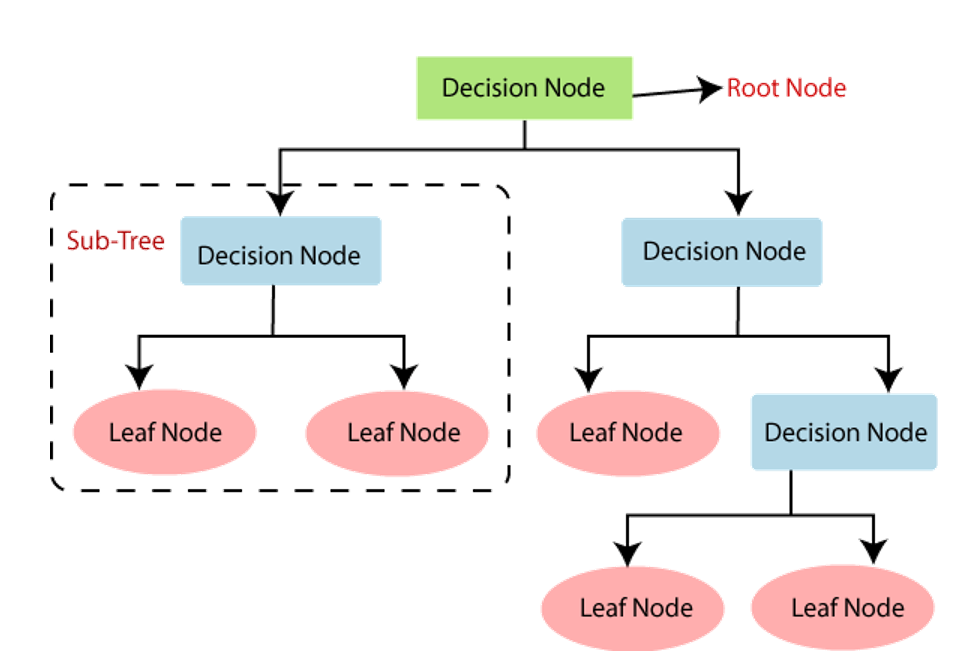

In [ ]:
Image('DecTree_1.png', width = 800)

•**Root Node:** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided
            into two or more homogeneous sets.

•**Decision Node:** Decision node is the one which is further divided into leaf nodes based on a certain condition.
            
•**Leaf Node:** Leaf nodes are the final output node, and the tree cannot be segregated further after getting a leaf node.

•**Splitting:** Splitting is the process of dividing the decision node/root node into sub- nodes according to the given
            conditions.
            
•**Branch/Sub Tree:** A tree formed by splitting the tree.

•**Pruning:** Pruning is the process of removing the unwanted branches from the tree.

•**Parent/Child node:** The root node of the tree is called the parent node, and other nodes are called the child nodes.


## **<font color= green>3. Attribute Selection Measure (ASM)</font>**

While implementing a Decision tree, the main issue that arises is selection of the best attribute for the root node
and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM.

Attribute Selection is the most important parameter which goes ahead and decides which column is important based on it's information gain or Gini index.

## **<font color= blue>Information Gain</font>**:

A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

Information Gain= Entropy(S)- [(Weighted Avg) *Entropy (each feature)]

Where,Entropy is an information theory metric that measures the impurity or uncertainty in a group of observations.

## **<font color= blue>Gini index</font>**:

An attribute with the low Gini index should be preferred as compared to the high Gini index. It only creates binary splits using CART algorithm.
Gini index can be calculated using the below formula:




In [ ]:
uploaded = files.upload()

Saving DecTree_2.png to DecTree_2.png


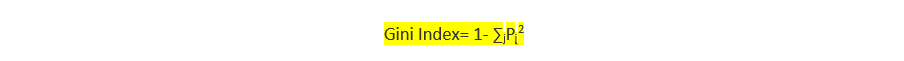

In [ ]:
Image('DecTree_2.png')

# <font color = blue>**Code**</font>

## **<font color= red>1. Importing the Libraries & Reading the data</font>**

Let us import the necessary libraries and read the data first. The data we are going to use is 'cars' data which has 
different features of a car which go ahead and classify the car as unaccommodating, good, very good and accommodating.

In [1]:
import numpy as np
import pandas as pd

In [2]:
cars_train = pd.read_csv(r'cars_train.csv', header=None)
cars_test = pd.read_csv(r'cars_test.csv',header=None)

In [3]:
cars_train.head()

,0,1,2,3,4,5,6
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good


In [4]:
cars_test.head()

,0,1,2,3,4,5,6
0,med,vhigh,5more,4,small,low,unacc
1,vhigh,high,2,2,big,med,unacc
2,low,high,2,more,small,low,unacc
3,vhigh,vhigh,3,2,big,high,unacc
4,low,med,4,4,med,med,good


## **<font color= red>2. Adding missing Column headers</font>**

Since we do no have headers, we need to create one so that one could understand well which feature is contributing 
in predicting the class to which the car belongs.

In [8]:
# Adding missing header
cars_train.columns=["buying","maint","doors","persons","lug_boot","safety","classes"]
cars_test.columns=["buying","maint","doors","persons","lug_boot","safety","classes"]

In [9]:
print(cars_train.shape)
cars_train.head()

(1382, 7)


,buying,maint,doors,persons,lug_boot,safety,classes
0,vhigh,high,3,more,small,low,unacc
1,low,vhigh,3,4,small,med,unacc
2,low,high,5more,more,big,low,unacc
3,high,med,4,2,small,med,unacc
4,low,low,3,more,big,med,good


In [10]:
print(cars_test.shape)
cars_test.head()

(346, 7)


,buying,maint,doors,persons,lug_boot,safety,classes
0,med,vhigh,5more,4,small,low,unacc
1,vhigh,high,2,2,big,med,unacc
2,low,high,2,more,small,low,unacc
3,vhigh,vhigh,3,2,big,high,unacc
4,low,med,4,4,med,med,good


##  **<font color= red>3. Check for Null values</font>**

Now that we have our dataset ready, let us check for any null values. 

In [11]:
cars_train.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

In [12]:
cars_test.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
classes     0
dtype: int64

No null values present in the dataset. Now let us focus on y-variable (dependent variable).
In this dataset, y-variable is "classes". This means, depending on the independent columns, class will be
predicted. These independent columns will decide whether the car can be categorized as good,vgood, acc or unacc.
Let us check now the total number of classes present in the training data.

In [13]:
cars_train["classes"].unique()

array(['unacc', 'good', 'vgood', 'acc'], dtype=object)

## **<font color= red>4. Drop 'classes' column from Test data</font>**

The Train data should contain y-variable (Classes) and not the Test data.So we are dropping the column (Classes)
from the test data. 

In [14]:
cars_test.drop("classes",axis=1,inplace=True)
cars_test.head()

,buying,maint,doors,persons,lug_boot,safety
0,med,vhigh,5more,4,small,low
1,vhigh,high,2,2,big,med
2,low,high,2,more,small,low
3,vhigh,vhigh,3,2,big,high
4,low,med,4,4,med,med


## **<font color= red>5. Label Encoding</font>**

Now let us label encode our train data, to convert all the categorical columns to encoded numbers.

In [15]:
from sklearn.preprocessing import LabelEncoder

colname = ["buying","maint","doors","persons","lug_boot","safety","classes"]

le= LabelEncoder()

for x in colname:
    cars_train[x]=le.fit_transform(cars_train[x])



In [16]:
cars_train.head()

,buying,maint,doors,persons,lug_boot,safety,classes
0,3,0,1,2,2,1,2
1,1,3,1,1,2,2,2
2,1,0,3,2,0,1,2
3,0,2,2,0,2,2,2
4,1,1,1,2,0,2,1


## **<font color= red>6. Splitting the train data</font>**

Prior to applying the train test split, we need to split the train data into X and Y.  

In [20]:
X = cars_train.values[:,0:-1] # all columns and rows till the second last col
Y=cars_train.values[:,-1] # the last col
Y= Y.astype(int) # Converting Y as int

In [21]:
X.shape

(1382, 6)

In [22]:
Y.shape

(1382,)

## **<font color= red>7. Scaling the train data</font>**

Now let us scale the 'X' from train_data to avoid any unwanted bias to any columns.

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)


In [27]:
print(X)

[[ 1.33507272 -1.3488262  -0.45682233  1.21505861  1.22565305  0.00176987]
 [-0.44760409  1.32688358 -0.45682233 -0.01064285  1.22565305  1.22474807]
 [-0.44760409 -1.3488262   1.33418038  1.21505861 -1.21505663  0.00176987]
 ...
 [-1.33894249  1.32688358  1.33418038 -0.01064285  0.00529821 -1.22120833]
 [ 0.44373431  0.43498032  0.43867903 -0.01064285 -1.21505663  0.00176987]
 [ 0.44373431 -0.45692294  1.33418038  1.21505861  1.22565305 -1.22120833]]


In [28]:
X.shape

(1382, 6)

## **<font color= red>8. Performing Train-Test split on Training data</font>**

Now we perform the traditional train test split.The test size is about 20 %.

In [29]:
# Splitting the training & testing data
# <1000 in range of 80-20
# >1000 in the range of

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [30]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1105, 6)
(1105,)
(277, 6)
(277,)


## **<font color= red>9. Running Decision Tree algorithm</font>**

Now let us apply Decision Tree algorithm and fit it on training data of X & Y

In [31]:
# Running Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier()

model_DecisionTree.fit(X_train,Y_train)



DecisionTreeClassifier()

## **<font color= red>10. Predicting Y_pred based on X_test</font>**

It is time to predict Y_pred based on X_test data. We are then listing Y_test & Y_pred side by side to see how acuurate the 
prediction looks like.

In [33]:
# Predicting Y_pred
Y_pred = model_DecisionTree.predict(X_test)
print(Y_pred)
print(list(zip(Y_test,Y_pred)))

[2 2 2 2 2 2 0 2 2 1 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 0 2
 2 0 2 2 2 2 2 3 0 2 0 3 0 2 0 2 2 2 2 2 2 0 2 0 2 2 0 2 2 0 2 0 0 2 2 0 3
 0 0 2 2 0 2 0 2 2 0 2 2 0 2 2 2 0 2 2 0 2 2 2 2 2 0 3 2 2 0 0 2 2 2 0 2 0
 3 2 0 3 2 2 2 2 2 3 2 0 2 0 2 2 0 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 0 2
 2 2 2 2 0 2 2 0 2 2 2 2 2 2 1 2 2 2 3 1 0 2 2 0 2 2 2 2 2 0 2 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 1 0 2 2 2 2 2 0 0 2 3 1 2 2 0 0 2 0 0
 0 2 2 0 2 2 2 2 0 0 0 2 2 2 0 2 0 2 0 0 0 1 1 2 2 2 0 2 2 2 2 0 1 2 2 2 2
 2 0 2 2 2 2 2 0 2 2 0 0 2 2 1 0 2 2]
[(2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (1, 1), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (0, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (0, 0), (1, 0), (2, 2), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (0, 0), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (3, 3), (0, 0), (2, 2), (0, 0), (3, 3), (0, 0), (2, 2), (0, 0), (2, 2), (2, 2), (2, 

## **<font color= red>11. Evaluating the model</font>**

Model evaluation we are going to do using confusion_matrix, classification_report & accuracy_score.

In [34]:
# Accuracy score
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

Y_pred=model_DecisionTree.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy score:",acc)

[[ 69   1   1   0]
 [  4   8   0   0]
 [  0   0 185   0]
 [  0   0   0   9]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.89      0.67      0.76        12
           2       0.99      1.00      1.00       185
           3       1.00      1.00      1.00         9

    accuracy                           0.98       277
   macro avg       0.96      0.91      0.93       277
weighted avg       0.98      0.98      0.98       277

Accuracy score: 0.9783393501805054


We have obtained a very high accuracy of 97 % and almost a very high recall for all the classes (0,1,2 & 3). This means the 
model is perfroming exceptionally well.

## **<font color= red>12. Checking the Feauture Importance (Information Gain)</font>**

Feature importance will tell us how Decision Tree is giving importance to different columns.

In [38]:
print(list(zip(cars_train.columns[0:-1],model_DecisionTree.feature_importances_)))

[('buying', 0.22109151573185634), ('maint', 0.18220929667385857), ('doors', 0.062005934167191426), ('persons', 0.19416417958936033), ('lug_boot', 0.09649820544838367), ('safety', 0.24403086838934968)]


To give an example, in this code we have max importance to safety =0.24 which makes it the root node.
Whereas we have min importance to doors =0.06 which makes it the leaf node.

To summarise, the model will be running and checking the safety attribute first in deciding in which class the model
will belong and one by one it will check all the attributes in the decreasing order of Feauture importance till the point 
it reaches the leaf node (attribute doors in this case).

In [40]:
model_DecisionTree.score(X_train,Y_train)

1.0

## **<font color= red>13. Checking the graphical representation of model</font>**

The code below is used to generate a text file for the above model. This can be then be then visualized on 'webgraphviz.com'
to see how the decision tree looks like.

In [45]:
# Generate the file and upload in webgraphviz.com to plot the decision tree

from sklearn import tree
with open(r"model_DecisionTree.txt","w") as f:

    f = tree.export_graphviz(model_DecisionTree,feature_names=cars_train.columns[0:-1],
                             out_file=f)


To visualize the tree, just copy the text code form 'model_DecisionTree.txt' file and paste it on 'webgraphviz.com'.
It will generate a decision tree for the given text.

So today we understood how Decision Tree works and how it uses the logic similar to nested if where we check the
attribute having highest importance first and then go on checking the less important attributes in the decreasing order of
their importance gain. 
The only drawback of Decision tree would be the fact that it is designed to be overfitted indicating it will perform 
well on training data, but poor on testing data or high variances.